# Import Libraries

In [26]:
import numpy as np  # used for mathematical operations
import pandas as pd  # for loading CSV data
import matplotlib.pyplot as plt  # for plotting datafrom 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime
train= pd.read_csv("C:/Users/pamela.afful/Desktop/Predict Data/Train.csv")
riders=pd.read_csv("C:/Users/pamela.afful/Desktop/Predict Data/Riders.csv")
test= pd.read_csv("C:/Users/pamela.afful/Desktop/Predict Data/Test.csv")
from sklearn.preprocessing import StandardScaler

riders.columns
train.isnull().sum()

train.columns
train.isnull().sum() #check for null values


Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

# Fill Null Values and concatenate dataframes

In [27]:
train.columns = [col.replace(" ","_") for col in train.columns]
train['Precipitation_in_millimeters']=train['Precipitation_in_millimeters'].fillna(value=train['Precipitation_in_millimeters'].mean())
train['Temperature']=train['Temperature'].fillna(value=train.Temperature.mean())

test.columns = [col.replace(" ","_") for col in test.columns]
test['Precipitation_in_millimeters']=test['Precipitation_in_millimeters'].fillna(value=test['Precipitation_in_millimeters'].mean())
test['Temperature']=test.Temperature.fillna(value=test.Temperature.mean())

To ensure that the model runs efficiently, I use the columns on the train set are the same as the columns on the test data set. The train and test sets are then concatenated to perform neccessary transformations

In [28]:

train = train[['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',   # Use the same columns in test data on train data
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_(Mo_=_1)', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_(Mo_=_1)',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_-_Time',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Time',
       'Distance_(KM)', 'Temperature', 'Precipitation_in_millimeters',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Rider_Id','Time_from_Pickup_to_Arrival']]


df = pd.concat([train,test])
df.head()


,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Pickup_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:27:30 AM,4,20.400000,7.905797,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,11:44:09 AM,16,26.400000,7.905797,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,12:53:03 PM,3,23.258889,7.905797,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9:43:06 AM,9,19.200000,7.905797,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:05:23 AM,9,15.400000,7.905797,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0


# Convert time columns into datetime objects and get the difference between Confirmation Time and Placement Time

Since the data contains time string objects, it proves useful to first convert these into date time objects, then taking the time difference between Confirmation Time and Pickup time

In [29]:
# Convert Columns date time objects

time=[datetime.strptime(i, '%H:%M:%S %p') for i in df['Arrival_at_Pickup_-_Time']]
df['Arrival at Pickup - Time']=pd.Series(time)

time2=[datetime.strptime(i, '%H:%M:%S %p') for i in df['Pickup_-_Time']]
df['Pickup - Time']=pd.Series(time2)


time3=[datetime.strptime(i, '%H:%M:%S %p') for i in df['Placement_-_Time']]
df['Placement Time']=pd.Series(time3)

time4=[datetime.strptime(i, '%H:%M:%S %p') for i in df['Confirmation_-_Time']]
df['Confirmation Time']=pd.Series(time4)

########################Getting time difference between arrival an Pickup#######################
Time_diff= df['Confirmation Time']-df['Pickup - Time'] # Do not change
seconds=[(i.seconds)/60 for i in Time_diff]
df['Arrival_pickup_Time_diff_in_minutes']=pd.Series(seconds)

#Time_diff2= df['Confirmation Time']-df['Placement Time']
#seconds2=[(i.seconds)/60 for i in Time_diff2]
#df['Placement_Confirm_Time_diff_in_seconds']=pd.Series(seconds2)



df.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,Arrival at Pickup - Time,Pickup - Time,Placement Time,Confirmation Time,Arrival_pickup_Time_diff_in_minutes
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,1900-01-01 10:04:47,1900-01-01 10:27:30,1900-01-01 09:35:46,1900-01-01 09:40:10,1392.666667
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,1900-01-01 11:40:22,1900-01-01 11:44:09,1900-01-01 11:16:16,1900-01-01 11:23:21,1419.200000
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,1900-01-01 12:49:34,1900-01-01 12:53:03,1900-01-01 12:39:25,1900-01-01 12:42:44,1429.683333
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,1900-01-01 09:37:56,1900-01-01 09:43:06,1900-01-01 09:25:34,1900-01-01 09:26:05,1422.983333
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,1900-01-01 10:03:53,1900-01-01 10:05:23,1900-01-01 09:55:18,1900-01-01 09:56:18,1430.916667


# Exploratory Data Analysis

In [30]:
df.isnull().sum()

Order_No                                   0
User_Id                                    0
Vehicle_Type                               0
Platform_Type                              0
Personal_or_Business                       0
Placement_-_Day_of_Month                   0
Placement_-_Weekday_(Mo_=_1)               0
Placement_-_Time                           0
Confirmation_-_Day_of_Month                0
Confirmation_-_Weekday_(Mo_=_1)            0
Confirmation_-_Time                        0
Arrival_at_Pickup_-_Day_of_Month           0
Arrival_at_Pickup_-_Weekday_(Mo_=_1)       0
Arrival_at_Pickup_-_Time                   0
Pickup_-_Day_of_Month                      0
Pickup_-_Weekday_(Mo_=_1)                  0
Pickup_-_Time                              0
Distance_(KM)                              0
Temperature                                0
Precipitation_in_millimeters               0
Pickup_Lat                                 0
Pickup_Long                                0
Destinatio

In [31]:
df.describe()


,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,Arrival_pickup_Time_diff_in_minutes
count,28269.000000,28269.000000,28269.000000,28269.000000,28269.000000,28269.000000,28269.000000,28269.000000,28269.000000,28269.000000,28269.000000,28269.000000,28269.000000,28269.000000,28269.000000,28269.000000,21201.000000,28269.000000
mean,2.752167,15.645725,3.242527,15.645831,3.242633,15.645831,3.242633,15.645831,3.242633,9.494641,23.255696,7.592254,-1.281613,36.811235,-1.282499,36.811247,1556.920947,1376.136198
std,0.624872,8.793210,1.570692,8.793188,1.570642,8.793188,1.570642,8.793188,1.570642,5.645726,3.217790,2.716162,0.030392,0.037595,0.034677,0.044420,987.270788,165.113208
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000,596.916667
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,6.651759,-1.300921,36.784605,-1.301043,36.785934,882.000000,1405.383333
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,7.905797,-1.279395,36.807040,-1.284001,36.807974,1369.000000,1418.333333
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,7.905797,-1.257147,36.829721,-1.261199,36.828916,2040.000000,1425.950000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.018958,7883.000000,1438.900000


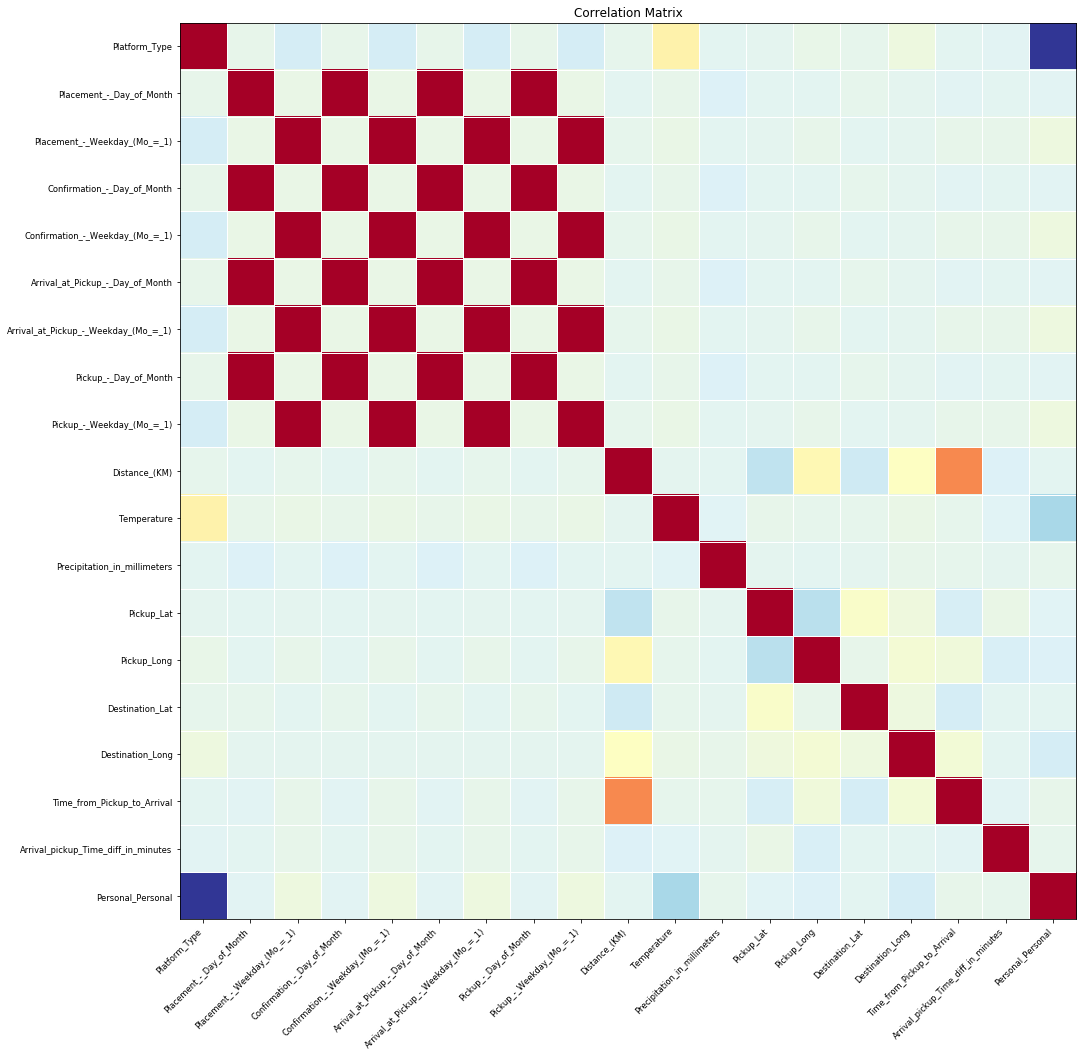

In [32]:
train2=df[df['Time_from_Pickup_to_Arrival'].notna()]

column_titles = [col for col in df.columns if col!= 'Time_from_Pickup_to_Arrival'] + ['Time_from_Pickup_to_Arrival']
df_dummies=pd.get_dummies(train2,columns=['Personal_or_Business'],drop_first=True,prefix='Personal')
#df_dummies=df_dummies.reindex(columns=column_titles)
df_dummies.isnull().sum()
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

In [33]:
from scipy.stats import pearsonr
corrs = df_dummies.corr()['Time_from_Pickup_to_Arrival'].sort_values(ascending=False)
# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Time_from_Pickup_to_Arrival']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['Time_from_Pickup_to_Arrival'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T   
df_cp

,Correlation_Coefficient,P_Value
Distance_(KM),0.580608,0.000000
Destination_Long,0.070425,0.000000
Pickup_Long,0.060285,0.000000
Personal_Personal,0.013354,0.051848
Pickup_-_Weekday_(Mo_=_1),0.009744,0.155959
Arrival_at_Pickup_-_Weekday_(Mo_=_1),0.009744,0.155959
Confirmation_-_Weekday_(Mo_=_1),0.009744,0.155959
Placement_-_Weekday_(Mo_=_1),0.009693,0.158160
Temperature,0.005772,0.400716
Precipitation_in_millimeters,0.003842,0.575890


From the above analysis it is clear to see that variables such as Placement_Day_of_Month, Confirmation_day_of_month, Arrival_at_pickup_day_of_month are perfectly correlated with each other. This makes sense as we assume that the placing, confirming and collection of an order would all happen on the same day. Effectively all these columns are giving the same information. To avoid autocorrelation, these variables are dropped.

The same logic applies for columns Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Weekday_(Mo_=_1)	,Pickup_-_Weekday_(Mo_=_1). 

Due to the significant correlation between Placement_-_Weekday_(Mo_=_1) and 'Time_from_Pickup_to_Arrival', I keep this variable as it may have some influence over how long it takes for an order to be delivered.

I also drop string variables such as Rider ID, Order No as they are highly unique features and are unlikely to explain any of the variation viewed in the time it takes for an order to be delivered. Since I've already calculated the time difference between the confirmation time and pick_up time, all other time string variables are also droped.




In [34]:
#########Drop Uneccesary Variables#################3
df = df.drop(['Placement_-_Day_of_Month','Confirmation_-_Weekday_(Mo_=_1)','Confirmation_-_Day_of_Month','Arrival_at_Pickup_-_Day_of_Month',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_(Mo_=_1)','Arrival at Pickup - Time','Pickup - Time','Arrival_at_Pickup_-_Time','Pickup_-_Time','Order_No', 'User_Id', 'Vehicle_Type','Rider_Id','Placement Time','Confirmation Time','Confirmation_-_Time','Placement_-_Time'],axis=1)

df.columns

Index(['Platform_Type', 'Personal_or_Business', 'Placement_-_Weekday_(Mo_=_1)',
       'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Time_from_Pickup_to_Arrival',
       'Arrival_pickup_Time_diff_in_minutes'],
      dtype='object')

# Split data into respective train and train set

In [35]:

train2=df[df['Time_from_Pickup_to_Arrival'].notna()]
test2=df[df['Time_from_Pickup_to_Arrival'].isnull()].drop('Time_from_Pickup_to_Arrival',axis=1) #test set to be used for Zindi Submission






#  Split X and y test-train data and scale features

In [36]:
encode_df_train=pd.get_dummies(train2,columns=['Personal_or_Business'],drop_first=True,prefix='Personal')
encode_df_test=pd.get_dummies(test2,columns=['Personal_or_Business'],drop_first=True,prefix='Personal')

In [45]:
y= encode_df_train['Time_from_Pickup_to_Arrival']
X=encode_df_train.drop('Time_from_Pickup_to_Arrival',axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)
test_scaled=scaler.fit_transform(encode_df_test) #For Zindi

# Fit model using Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=95,random_state=0, max_depth=8,)
RF.fit(x_train_scaled, y_train)
RF.predict(x_test_scaled)

array([1995.2019264 , 2165.56401584, 1369.89151946, ..., 1344.76447594,
       1991.24996692, 1231.51445122])

# Evaluate model

In [54]:
from sklearn.metrics import mean_squared_error
def test_model2(x_test, y_test):
    #x_test= x_test.reshape(-1,1)
    #y_test = y_test.reshape(-1,1)
    return round(np.sqrt(mean_squared_error(y_test.astype(int), RF.predict(x_test))),2)  

In [56]:
test_model2(x_test_scaled, y_test)

786.14

# Zindi Submission

In [255]:
pred=RF.predict(test_scaled)
daf=pd.DataFrame(pred, columns=['Time from Pickup to Arrival'])
output=pd.DataFrame({'Order No':test['Order_No']})
submission=output.join(daf)
submission.to_csv('submission10.csv',index=False)


In [236]:
print( 'RMSE from Zindi :'+str(769.587019315882))

RMSE from Zindi :769.587019315882
